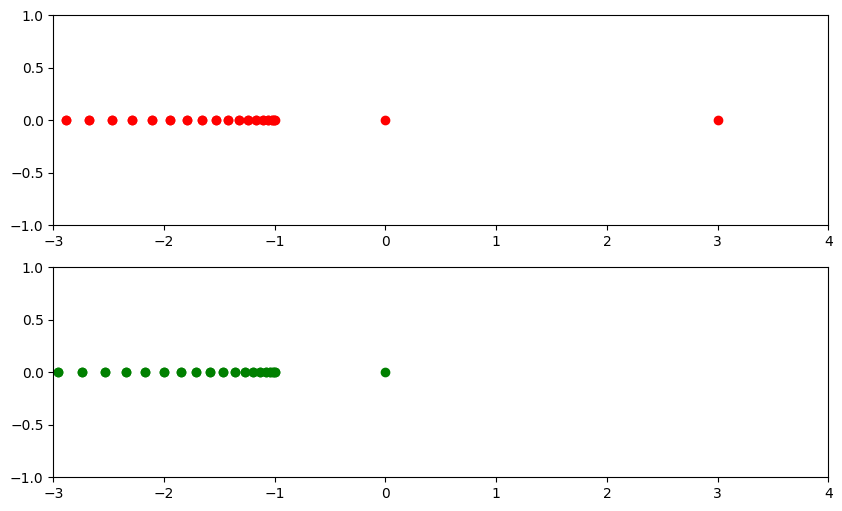

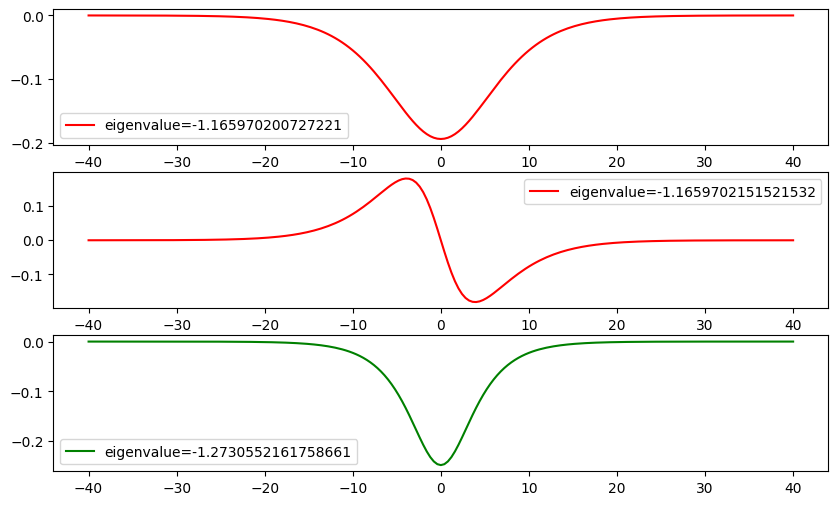

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def sech(x):
    return 1 / np.cosh(x)

L = 40  # box size  -L,L
n = 200  # modes
TOL = 1e-8

# coefficients
a = np.zeros(n + 1)
for j in range(1, n + 2):
    def integrand(x, j, L):
        return (1 / (2 * L)) * np.cos((j - 1) * np.pi * x / L) * sech(x) ** 2

    a[j - 1], _ = quad(integrand, -L, L, args=(j, L), epsabs=TOL, epsrel=TOL)

A = np.zeros((n + 1, n + 1))
for j in range(1, n + 2):
    A[j - 1, j - 1] = a[0]

for jj in range(2, n + 2):
    for j in range(jj, n + 2):
        A[j - jj, j - 1] = a[jj - 1]
        A[j - 1, j - jj] = a[jj - 1]

D2 = np.zeros((n + 1, n + 1))
for j in range(1, n + 2):
    D2[j - 1, j - 1] = -1 - ((np.pi / L) ** 2) * (n / 2 + 1 - j) ** 2

Lplus = D2 + 6 * A
lam, V = np.linalg.eig(Lplus)
lam = np.real(lam)

sorted_indices = np.argsort(np.real(lam))[::-1] 
lamsort = lam[sorted_indices]
Vsort =V[:, sorted_indices]


Lminus = D2 + 2 * A
lam2, V2 = np.linalg.eig(Lminus)
lam2 = np.real(lam2)

sorted_indices = np.argsort(np.real(lam2))[::-1] 
lam2sort = lam2[sorted_indices]
V2sort =V2[:, sorted_indices]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lam, np.imag(lam), 'ro')
plt.axis([-3, 4, -1, 1])
plt.subplot(2, 1, 2)
plt.plot(lam2, np.imag(lam2), 'go')
plt.axis([-3, 4, -1, 1])

x = np.linspace(-L, L, n + 1)
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(x, Vsort[:, 0], 'r', label=f"eigenvalue={lam[-1]}")
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(x, Vsort[:, 1], 'r', label=f"eigenvalue={lam[-2]}")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(x, V2sort[:, 0], 'g', label=f"eigenvalue={lam2[-1]}")
plt.legend()

plt.show()


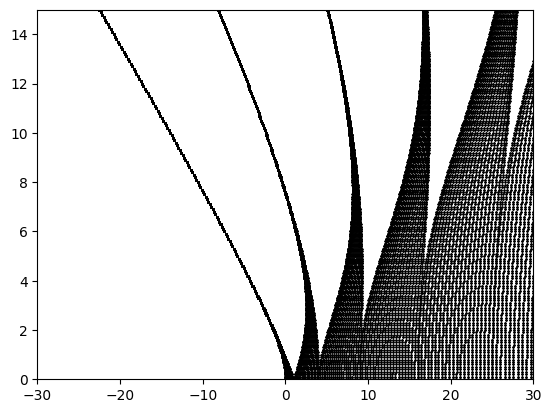

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
q_values = np.arange(0, 15.1, 0.1)  # q values to consider
n = 10  # number of Fourier modes
cuts = 40  # number of mu slices
freq = 2  # frequency omega

# Loop over q values
for q in q_values:
    lam = []
    for jcut in np.arange(-freq / 2, freq / 2 + freq / cuts, freq / cuts):
        A = np.zeros((2 * n + 1, 2 * n + 1))
        for j in range(1, 2 * n + 2):
            A[j - 1, j - 1] = (n + 1 - j + jcut) ** 2  # derivative elements

        for j in range(1, 2 * n + 2 - freq):
            A[j + freq - 1, j - 1] = q
            A[j - 1, j + freq - 1] = q

        W, V = np.linalg.eig(A)  # compute eigenvalues
        lam.extend(W.real)  # track all eigenvalues

    plt.plot(np.real(lam), np.imag(lam) + q, 'k.', markersize=1)

plt.axis([-30, 30, 0, 15])
plt.show()
